In [10]:
import pandas as pd

In [20]:
df = pd.read_csv('../creditcard.csv')

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
df.shape

(284807, 31)

In [15]:
print(df['Class'].value_counts())
print((df['Class'].sum() / len(df)) * 100)

Class
0    284315
1       492
Name: count, dtype: int64
0.1727485630620034


In [16]:
df.isnull().sum().sum()

np.int64(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Note: you may need to restart the kernel to use updated packages.


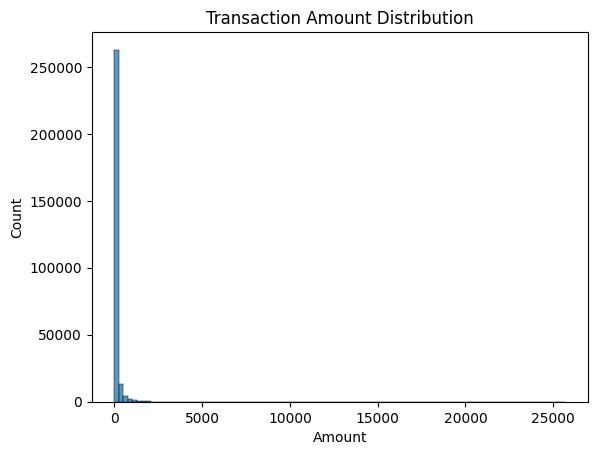

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Amount'], bins=100)
plt.title('Transaction Amount Distribution')
plt.show()

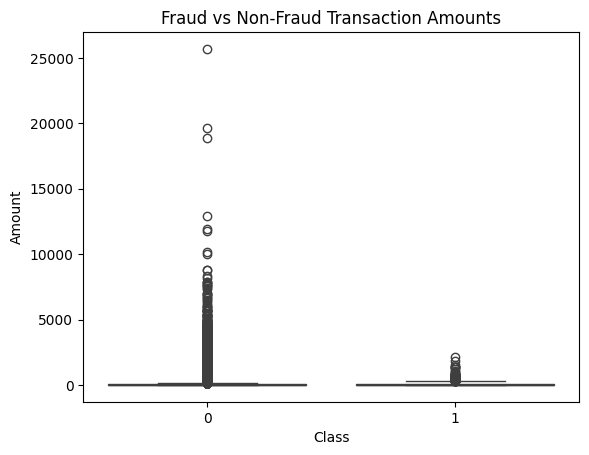

In [26]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Fraud vs Non-Fraud Transaction Amounts")
plt.show()

In [28]:
from sklearn.metrics import accuracy_score

y_pred_majority = [0] * len(df)
accuracy_score(df['Class'], y_pred_majority)

0.9982725143693799

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df['Class'], y_pred_majority)
cm

array([[284315,      0],
       [   492,      0]])

In [31]:
from sklearn.metrics import precision_score,recall_score, f1_score

precision = precision_score(df['Class'], y_pred_majority, zero_division=0)
recall = recall_score(df['Class'], y_pred_majority, zero_division=0)
f1 = f1_score(df['Class'], y_pred_majority, zero_division=0)

precision, recall, f1

(0.0, 0.0, 0.0)

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test,y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((227845, 30), (56962, 30))

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.69      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



c:\fraudDetection\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[56852,    12],
       [   30,    68]])

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((227845, 30), (56962, 30))

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr_scaled = LogisticRegression(max_iter=500)
model_lr_scaled.fit(X_train_scaled, y_train)

y_pred_lr_scaled = model_lr_scaled.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr_scaled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [41]:
from sklearn.metrics import average_precision_score

y_prob_lr = model_lr_scaled.predict_proba(X_test_scaled)[:, 1]
pr_auc = average_precision_score(y_test, y_prob_lr)
pr_auc


0.7413820992780461

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf


array([[56859,     5],
       [   17,    81]])